## <img src= '10DS_icon2.png' width = '80' height = '80' align = 'left'/> Data Scientist Technical Exercise
### National Tutoring Programme (Academic year 2023/24)
The **[National Tutoring Programme (NTP)](https://explore-education-statistics.service.gov.uk/find-statistics/national-tutoring-programme)** is a scheme that provides support for pupils and students most affected by disruption to their education as a result of the coronavirus (COVID-19) pandemic. The **2023/24** academic year is the **fourth and final year** of the NTP. In the **2023/24** academic year, the **Department for Education (DfE)** provided core funding for the NTP directly to schools to enable them to decide how best to provide tutoring for their pupils. 

### The Task
**The `Department for Education` is considering bidding for `£20m` to intensify the NTP in up to `ten local authorities`. No 10 Delivery Unit have asked me to analyse the data in this space to help decide `in which local authorities we should intensify the programme` in order to increase the uptake and impact of the NTP**.

* See notebook section [Number of Schools Participating by Local Authority (2023/24 academic year)](#Number-of-Schools-Participating-by-Local-Authority-(2023/24-academic-year)) for **Bottom 10 Local Authorities** which could benefit from additional funding.

### The Dataset
**NOTE:** The [NTP dataset](https://content.explore-education-statistics.service.gov.uk/api/releases/cc94c51a-ec97-4ec2-2090-08dbcfa71364/files) used in this analysis is for **2023/24 academic year up to October 2023.** The data covers **England only.** I did not consider previous academic years because according to the data provider ***"...comparisons against figures in previous releases should be treated with caution due to changes in data sources and methodology."*** See [National Tutoring Programme](https://explore-education-statistics.service.gov.uk/find-statistics/national-tutoring-programme)

#### Advice from No 10 Delivery Unit
**No 10 Delivery Unit** have advised that I may (wish to) consider:

* The **characteristics and locations of local authorities** in relation to their NTP take up
* Where **funding** might be **allocated** for **greatest impact**
* A **recommendation for NTP intensification** based on your work so far
* How you would **develop your analysis further** given more time

### Analysis Approach
This notebook includes the following sections and/or visualizations:

* [Preliminary-Findings-about-the-dataset](#Some-Findings)
* [Percentage of NTP Participation by Region (Academic year 2023/24)](#Percentage-of-NTP-Participation-by-Region-(Academic-year-2023/24))
* [Number of NTP Courses Start by Pupils by Region (Academic year 2023/24)](#Number-of-NTP-Courses-Start-by-Pupils-by-Region-(Academic-year-2023/24))
* [Total NTP courses started in the 2023/24 Academic Year](#Total-NTP-courses-started-in-the-2023/24-Academic-Year)
* [Percentage of schools participating in NTP (2023/24 academic year)](#Percentage-of-schools-participating-in-NTP-(2023/24-academic-year))
* [Number of Schools Participating by Local Authority (2023/24 academic year)](#Number-of-Schools-Participating-by-Local-Authority-(2023/24-academic-year))
* [How you would develop your analysis further given more time?](#Final-Thoughts)
* [Where funding might be allocated for greatest impact](#Bottom-10-Local-Authorities)
* [A recommendation for NTP intensification based on your work so far](#A-recommendation-for-NTP-intensification-based-on-your-work-so-far)
* [Some Corrections](#Some-Corrections)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
ntp_2324 = pd.read_csv('./data_2023_24/2023.24_ntp_delivery_data_2023-12-14.csv')
print(ntp_2324.shape)
ntp_2324.head()

(170, 17)


,academic_year,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,old_la_code,new_la_code,la_name,total_type,school_phase,estimated_course_starts_by_pupils,total_schools,total_schools_participating,percentage_schools_participating
0,202324,2023,October,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,Total since start of NTP,All,4932327,-,-,-
1,202021,2021,August,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,Total in academic year,All,310717,-,-,-
2,202122,2022,August,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,Total in academic year,All,2215386,-,-,-
3,202223,2023,August,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,Total in academic year,All,2060618,21623,15316,70.8
4,202324,2023,October,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,Total in academic year,Primary,199923,16772,5758,34.3


In [3]:
z = ntp_2324.isnull().sum()
print(f'columns with missing values:\n{z[z > 0]}')

columns with missing values:
region_code     8
region_name     8
old_la_code    17
new_la_code    17
la_name        17
dtype: int64


In [4]:
ntp_2324.dtypes

academic_year                          int64
time_period                            int64
time_identifier                       object
geographic_level                      object
country_code                          object
country_name                          object
region_code                           object
region_name                           object
old_la_code                          float64
new_la_code                           object
la_name                               object
total_type                            object
school_phase                          object
estimated_course_starts_by_pupils      int64
total_schools                         object
total_schools_participating           object
percentage_schools_participating      object
dtype: object

#### If rows with missing data are dropped...

In [5]:
ntp_2324.dropna().shape

(153, 17)

#### Some Data Explorations...

In [6]:
ntp_2324.country_code.value_counts()

country_code
E92000001    170
Name: count, dtype: int64

In [7]:
ntp_2324.country_name.value_counts()

country_name
England    170
Name: count, dtype: int64

In [8]:
ntp_2324.geographic_level.value_counts()

geographic_level
Local authority    153
Regional             9
National             8
Name: count, dtype: int64

In [9]:
ntp_2324.region_code.value_counts(dropna = False)

region_code
E12000007    34
E12000002    25
E12000008    20
E12000009    16
E12000003    16
E12000005    15
E12000001    13
E12000006    12
E12000004    11
NaN           8
Name: count, dtype: int64

In [10]:
ntp_2324.region_name.value_counts(dropna = False)

region_name
London                      34
North West                  25
South East                  20
South West                  16
Yorkshire and The Humber    16
West Midlands               15
North East                  13
East of England             12
East Midlands               11
NaN                          8
Name: count, dtype: int64

In [11]:
ntp_2324.old_la_code.value_counts(dropna = False)

old_la_code
NaN      17
936.0     1
887.0     1
826.0     1
931.0     1
         ..
320.0     1
212.0     1
213.0     1
840.0     1
816.0     1
Name: count, Length: 154, dtype: int64

In [12]:
ntp_2324.new_la_code.value_counts(dropna = False)

new_la_code
NaN          17
E10000030     1
E06000035     1
E06000042     1
E10000025     1
             ..
E09000031     1
E09000032     1
E09000033     1
E06000047     1
E06000014     1
Name: count, Length: 154, dtype: int64

In [13]:
ntp_2324.la_name.value_counts(dropna = False)

la_name
NaN               17
Surrey             1
Medway             1
Milton Keynes      1
Oxfordshire        1
                  ..
Waltham Forest     1
Wandsworth         1
Westminster        1
County Durham      1
York               1
Name: count, Length: 154, dtype: int64

In [14]:
ntp_2324.geographic_level.value_counts(dropna = False)

geographic_level
Local authority    153
Regional             9
National             8
Name: count, dtype: int64

In [15]:
ntp_2324.time_period.value_counts(dropna = False)

time_period
2023    168
2021      1
2022      1
Name: count, dtype: int64

In [16]:
ntp_2324.school_phase.value_counts(dropna = False)

school_phase
All          167
Primary        1
Secondary      1
Other          1
Name: count, dtype: int64

### Some Findings
* The **country_code** and **country_name** columns do not contribute any pattern to the dataset. These can be dropped!
* **region_code** is redundant given **region_name** 
* Dropping rows with missing data would result to a loss of **`17`** rows out of **`170`**. This won't affect this analysis. In other cases imputation strategies would be considered to replace the missing data. Filling missing data using the mean, median, mode or using other more complex strategies.

**Descriptions of variable names** in the dataset provided by the data provider are as below (suggesting that these are probably the most important features in the dataset):

        -----------------------------------------------------------------------------------------
        | Variable name                      |  Variable description                             |
        |------------------------------------|---------------------------------------------------|
        | estimated_course_starts_by_pupils  |  Course starts by pupils                          |
        |------------------------------------|---------------------------------------------------|
        | percentage_schools_participating   |  Percentage of schools Participating in NTP       |
        |------------------------------------|---------------------------------------------------|
        | school_phase                       |  Phase of education                               |
        |------------------------------------|---------------------------------------------------|
        | total_schools                      |  Total schools                                    |
        |------------------------------------|---------------------------------------------------|
        | total_schools_participating        |  Total School Participating in NTP                |
        |------------------------------------|---------------------------------------------------|
        | total_type                         |Total since start of NTP or Total in academic year |
        ------------------------------------------------------------------------------------------
       

In [17]:
df_ntp_2324 = ntp_2324.copy()
names = ['country_code', 'country_name', 'region_code']
df_ntp_2324.drop(names, axis = 1, inplace = True)
df_ntp_2324.dropna(inplace = True)

In [18]:
print(df_ntp_2324.shape)
z = df_ntp_2324.isnull().sum()
print(f'columns with missing values:\n{z[z > 0]}')

(153, 14)
columns with missing values:
Series([], dtype: int64)


In [19]:
df_ntp_2324.head()

,academic_year,time_period,time_identifier,geographic_level,region_name,old_la_code,new_la_code,la_name,total_type,school_phase,estimated_course_starts_by_pupils,total_schools,total_schools_participating,percentage_schools_participating
17,202324,2023,October,Local authority,East Midlands,831.0,E06000015,Derby,Total in academic year,All,2335,100,40,40
18,202324,2023,October,Local authority,East Midlands,830.0,E10000007,Derbyshire,Total in academic year,All,4781,411,153,37.2
19,202324,2023,October,Local authority,East Midlands,856.0,E06000016,Leicester,Total in academic year,All,2824,113,47,41.6
20,202324,2023,October,Local authority,East Midlands,855.0,E10000018,Leicestershire,Total in academic year,All,2363,283,78,27.6
21,202324,2023,October,Local authority,East Midlands,925.0,E10000019,Lincolnshire,Total in academic year,All,3268,357,107,30


In [20]:
df_ntp_2324.dtypes

academic_year                          int64
time_period                            int64
time_identifier                       object
geographic_level                      object
region_name                           object
old_la_code                          float64
new_la_code                           object
la_name                               object
total_type                            object
school_phase                          object
estimated_course_starts_by_pupils      int64
total_schools                         object
total_schools_participating           object
percentage_schools_participating      object
dtype: object

The columns **`academic_year`, `time_period`** and **`old_la_code`** should be of **string data types** since we won't be doing any maths on them.

Similarly, **`total_schools`, `total_schools_participating`, `percentage_schools_participating`** should be **numeric data type**.

In [21]:
cols_str = ['academic_year', 'time_period', 'old_la_code']
for col in cols_str:
    df_ntp_2324[col] = df_ntp_2324[col].apply(str)

In [22]:
cols_num = ['total_schools', 'total_schools_participating', 'percentage_schools_participating']
for col in cols_num:
    df_ntp_2324[col] = df_ntp_2324[col].apply(float)

In [23]:
df_ntp_2324.dtypes

academic_year                         object
time_period                           object
time_identifier                       object
geographic_level                      object
region_name                           object
old_la_code                           object
new_la_code                           object
la_name                               object
total_type                            object
school_phase                          object
estimated_course_starts_by_pupils      int64
total_schools                        float64
total_schools_participating          float64
percentage_schools_participating     float64
dtype: object

### Percentage of NTP Participation by Region (Academic year 2023/24)

In [24]:
ntp_by_region = df_ntp_2324.region_name.value_counts(normalize = True) * 100
ntp_by_region

region_name
London                      21.568627
North West                  15.686275
South East                  12.418301
South West                   9.803922
Yorkshire and The Humber     9.803922
West Midlands                9.150327
North East                   7.843137
East of England              7.189542
East Midlands                6.535948
Name: proportion, dtype: float64

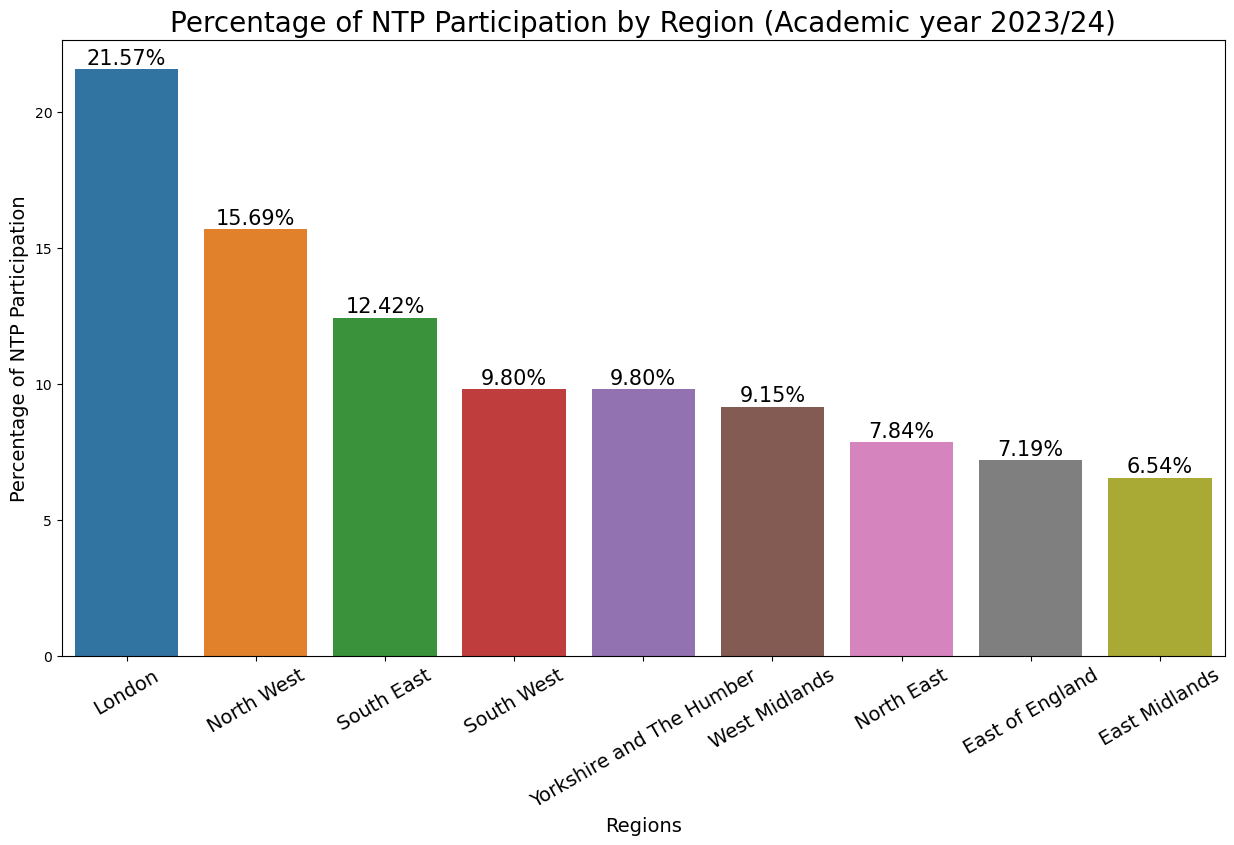

In [25]:
fig, ax = plt.subplots(figsize = (15, 8))
plots = sns.barplot(x = ntp_by_region.index, y = ntp_by_region.values, ax = ax)
for bar in plots.patches:
    plots.annotate(f'{bar.get_height():,.2f}%',
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Percentage of NTP Participation by Region (Academic year 2023/24)', fontsize = 20)
plt.ylabel('Percentage of NTP Participation', fontsize = 14)
plt.xlabel('Regions', fontsize = 14)
plt.xticks(rotation = 30, fontsize = 14)
plt.show()

In [26]:
fig.savefig('./data_2023_24/charts/Regional_PCT_NTP_Participation_202324.png')

### Number of NTP Courses Start by Pupils by Region (Academic year 2023/24)

In [27]:
ntp_start_by_region = df_ntp_2324.groupby('region_name').estimated_course_starts_by_pupils.sum()
ntp_start_by_region.sort_values(ascending = False)

region_name
London                      72863
North West                  54541
South East                  43745
West Midlands               38603
Yorkshire and The Humber    36180
East of England             31453
East Midlands               27347
South West                  23637
North East                  17237
Name: estimated_course_starts_by_pupils, dtype: int64

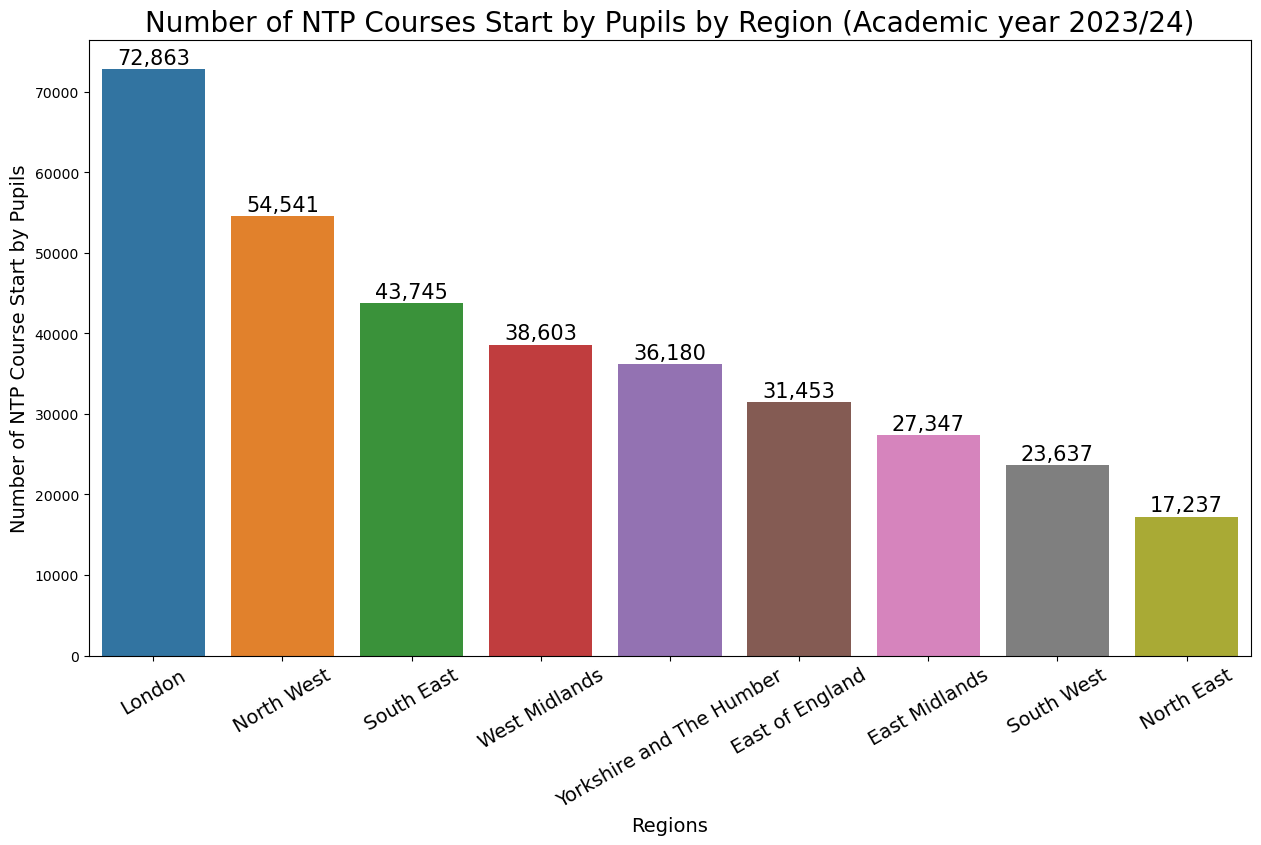

In [28]:
fig, ax = plt.subplots(figsize = (15, 8))
x = ntp_start_by_region.sort_values(ascending = False).index
y = ntp_start_by_region.sort_values(ascending = False).values
plots = sns.barplot(x = x, y = y, ax = ax)
for bar in plots.patches:
    plots.annotate(f'{bar.get_height():,.0f}',
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Number of NTP Courses Start by Pupils by Region (Academic year 2023/24)', fontsize = 20)
plt.ylabel('Number of NTP Course Start by Pupils', fontsize = 14)
plt.xlabel('Regions', fontsize = 14)
plt.xticks(rotation = 30, fontsize = 14)
plt.show()

In [29]:
fig.savefig('./data_2023_24/charts/NTP_Courses_Start_by_Pupils_by_Region_202324.png')

### Total NTP courses started in the 2023/24 Academic Year

In [30]:
total_courses_started = df_ntp_2324.estimated_course_starts_by_pupils.sum()
print(f'Total NTP courses started in the 2023/24 academic year: {total_courses_started: ,}')

Total NTP courses started in the 2023/24 academic year:  345,606


**This figure matches that published at [Headline facts and figures - 2023/24](https://explore-education-statistics.service.gov.uk/find-statistics/national-tutoring-programme)**

### Percentage of schools participating in NTP (2023/24 academic year)

In [31]:
Total_number_schools = df_ntp_2324.total_schools.sum()
Total_number_schools_participating = df_ntp_2324.total_schools_participating.sum()
pct_participation = Total_number_schools_participating / Total_number_schools * 100
print(f'Percentage of schools participating in NTP (2023/24 academic year): {pct_participation: .2f}%')

Percentage of schools participating in NTP (2023/24 academic year):  35.58%


**This figure matches that published at [Headline facts and figures - 2023/24](https://explore-education-statistics.service.gov.uk/find-statistics/national-tutoring-programme)**

### Number of Schools Participating by Local Authority (2023/24 academic year)

In [32]:
total_sch_by_la = df_ntp_2324.groupby('la_name').total_schools.sum().sort_values(ascending = False)
total_sch_by_la

la_name
Lancashire                603.0
Kent                      594.0
Essex                     555.0
Hampshire                 528.0
Hertfordshire             521.0
                          ...  
Bracknell Forest           38.0
Kensington and Chelsea     37.0
Rutland                    21.0
Isles of Scilly             1.0
City of London              1.0
Name: total_schools, Length: 153, dtype: float64

#### Get Top 5 and Bottom 10 Local Authorities

In [33]:
top_5_la = total_sch_by_la.head()
bottom_10_la = total_sch_by_la.tail(10)

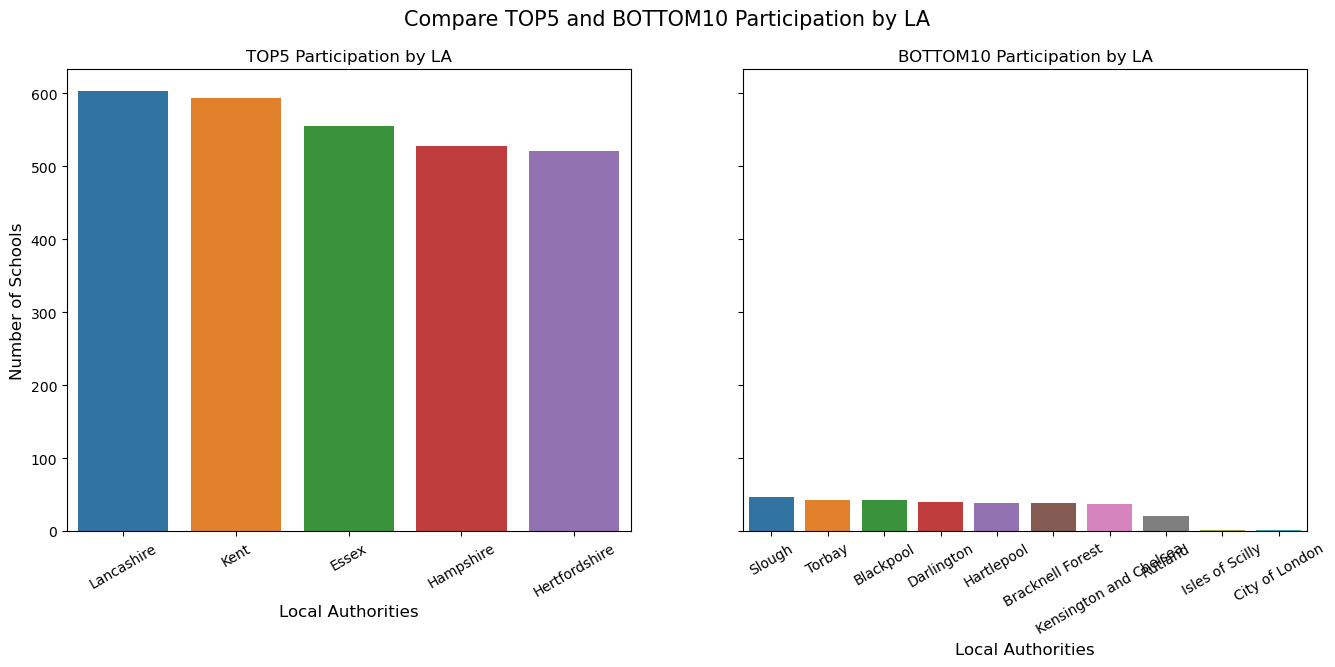

In [34]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6), sharey = True)
sns.barplot(x = top_5_la.index, y = top_5_la.values, ax = ax[0])
sns.barplot(x = bottom_10_la.index, y = bottom_10_la.values, ax = ax[1])
ax[0].title.set_text('TOP5 Participation by LA')
ax[1].title.set_text('BOTTOM10 Participation by LA')
ax[0].set_ylabel('Number of Schools', fontsize = 12)
ax[0].set_xlabel('Local Authorities', fontsize = 12)
ax[1].set_xlabel('Local Authorities', fontsize = 12)
fig.suptitle('Compare TOP5 and BOTTOM10 Participation by LA', fontsize = 15)
ax[0].set_xticklabels(top_5_la.index, rotation = 30)
ax[1].set_xticklabels(bottom_10_la.index, rotation = 30);

In [35]:
fig.savefig('./data_2023_24/charts/Compare_TOP5_and_BOTTOM10_Participation_by_LA.png')

### Bottom 10 Local Authorities
These are the **Bottom 10 Local Authorities** (chart on the right) in terms of NTP participation, ***where funding might be allocated for greatest impact***. They are the LA of **`Slough, Torbay, Blackpool, Darlington, Hartlepool, Bracknell Forest, Kensington and Chelsea, Rutland, Isles of Scilly, City of London`**. 

### A recommendation for NTP intensification based on your work so far
The recommendations above to **increase funding in the Bottom 10 LAs is based on the number of participations only**. It's would like to believe that most Regions and LAs with high participation also have many and/or large schools.

The dataset under analysis did not provide information on the **impact of the campaign**. Participation might be high but having little impact. As a former teacher, I consider something taught only when it has been learnt. I would consider ***intensifying*** the campaign only based on some evaluation metrics, which measures the level of impact. This is because the programme can also be intensified even in LAs with high participation if one could conclude that the impact is below a certain acceptable level. This not withstanding, the recommendation to **increase funding in the Bottom 10 LAs** stands.

### Final Thoughts

Below are some thoughts to address ***"How you would develop your analysis further given more time?"*** 
* Future [National Tutoring Programme Statistics publications](https://explore-education-statistics.service.gov.uk/find-statistics/national-tutoring-programme) would include ***"The publication of national, regional and school phase level `estimates of the characteristics of pupils who received tutoring` within the 2023/24 academic year"***.

* This information might be helpful in carrying out various **statistical hypothesis tests** to determine the impact of NTP Programme. For example to determine the **proportion of students who benefitted from NTP** and many others similar questions which need data and statistics to answer.

* The analysis could not reach any conclusion, based on the data, on the **disparity in the number of Schools participating in the NTP in the different Regions or Local Areas.** No criteria has been provided on how the funds were disbursed and how this might have affected the degree of participation. I have analyzed UK Covid-19 Dataset which can be found on my Github https://rb.gy/k3tv6y and https://rb.gy/4b0qx1. I can see some correlations between the Covid-19 Cases and the number of Schools Participation in NTP in the Regions. That is those **Regions with high Covid-19 Cases also have high number of Schools Participation in NTP**. However, this **correlation does not suggest any causation**! More information is required before making any conclusions, especially when it comes down to the Local Authorities.

#### The column `percentage_schools_participating`
I did not use this column in my analysis to avoid misleading interpretations since ***"`Schools that have not been allocated NTP funding are included in the number of schools used to calculate the percentage of school participation`. This is to make comparison with previous years more consistent and because funding allocations can change throughout the year"***. I avoided making any comparison with previous campaigns as already mentioned.

### Some Corrections
I wrote above that "***`No criteria has been provided on how the funds were disbursed` and how this might have affected the degree of participation.***"

I might leave this statement in this notebook for completeness since according to **Expectation** No 10 Delivery Unit ***"...do not expect an exhaustive analysis of all data. Rather, we would like to gain insight into your technical abilities and how you approach an exploratory problem from a data science / analytical perspective."*** 

I later found out that ***"Not every school is eligible for NTP. As of September 2023, less than 1% of schools included had not yet been allocated NTP funding for 2023/24, for example because they did not have pupils eligible for pupil premium. You can find more information about eligibility in 2023/23 [here](https://www.gov.uk/government/publications/national-tutoring-programme-guidance-for-schools-2022-to-2023/national-tutoring-programme-guidance-for-schools-2022-to-2023) and the allocation of funding to schools [here](https://www.gov.uk/government/publications/national-tutoring-programme-ntp-allocations-for-2023-to-2024-academic-year)"***.

Similarly, I found [National Tutoring Programme (NTP) grant funding: conditions of grant for 2023 to 2024 academic year](https://www.gov.uk/government/publications/national-tutoring-programme-ntp-allocations-for-2023-to-2024-academic-year/national-tutoring-programme-ntp-grant-funding-conditions-of-grant-for-2023-to-2024-academic-year).


Under [Embedding tutoring](https://www.gov.uk/government/publications/national-tutoring-programme-guidance-for-schools-2022-to-2023/national-tutoring-programme-guidance-for-schools-2022-to-2023) it's said "***As we return to pre-pandemic ways of living, our focus on helping pupils catch up on lost learning is turning towards the long-established challenge of tackling the attainment gap"***.

* This might translate to mean school with smart kids, not facing any *"attainment gap"*, might show low NTP participation.

Under [Tutoring arrangements](https://www.gov.uk/government/publications/national-tutoring-programme-guidance-for-schools-2022-to-2023/national-tutoring-programme-guidance-for-schools-2022-to-2023) ***"...funding allocations calculated based on the number of pupils eligible for PP"***. According to [Pupil premium](https://www.gov.uk/government/publications/pupil-premium), ***"Pupil premium is funding to improve education outcomes for disadvantaged pupils in schools in England"***.

* This should translate to mean that with many kids who don't qualify for PP in a particular LA that LA would indicate low NTP participation and the reverse is true.

*Old data* on LA [Slough](https://thelink.slough.gov.uk/file-download/download/public/2875) indicates that ***"Information for state-maintained schools on the National Tutoring Programme (NTP)
We are pleased to announce the launch of the second year of the NTP for the academic year 2021/22.
Last year saw over `300,000 pupils`, whose learning was significantly impacted by the pandemic, benefit from catch-up tutoring and mentoring via the NTP. `This year, we are aiming to reach thousands more pupils, all of whom will benefit from the support available.`"*** 

* However, this information does not seem to be reflected by the chart above! 


#### Unrelated Good News
I recently beat a **Kaggle Competition**!

An instructor in a course on Udemy gave a challenge that we should see whether we could obtain a better **RMSLE** for a past Kaggle Competition ***“Predicting the sale price of bulldozers sold at auctions”***  using **Random Forest Regression**. I was the only student who reported a score better than that which won the competition. This is how the instructor reacted to the results ***“woahhh! What an epic function! I love the handling of numerical/categorical/missing columns sequentially as well as the use of ordered feature names!”*** This was in regards to the approach I took to **engineer the features**! The notebook can be found on my Github repo at http://tinyurl.com/zvp3npha.

<img src = './data_2023_24/charts/daniel_reaction.png'/>

Unfortunately, this skill was not required for this exercise. If I would be successful, I can't wait to join 10DS Team - **Stephanie, Jonah, Cailin, Guy** and others in doing great things for government and people!